In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Cargar el archivo CSV
df = pd.read_csv('/content/impacts.csv', delimiter=';')

# Mostrar las primeras filas del DataFrame
print(df.head())

# Información general del dataset
print(df.info())

# Estadísticas descriptivas
print(df.describe())

  Object Name  Period Start  Period End  Possible Impacts  \
0    2006 WP1          2017        2017                 1   
1     2013 YB          2017        2046                23   
2     2008 US          2017        2062                30   
3  2010 VR139          2017        2076                24   
4  2015 ME131          2017        2096                85   

  Cumulative Impact Probability  Asteroid Velocity  Asteroid Magnitude  \
0                       5.2E-09              17.77                28.3   
1                       7.6E-05               8.98                31.4   
2                       1.6E-05              18.33                31.4   
3                      2,00E-07               4.99                26.7   
4                       2.3E-08              19.46                19.2   

   Asteroid Diameter (km)  Cumulative Palermo Scale  Maximum Palermo Scale  \
0                   0.007                     -8.31                  -8.31   
1                   0.002       

In [7]:
# Recargar el archivo con el delimitador correcto
df = pd.read_csv('/content/impacts.csv', delimiter=';')

# Mostrar las primeras filas para entender la estructura del archivo
df.head()

,Object Name,Period Start,Period End,Possible Impacts,Cumulative Impact Probability,Asteroid Velocity,Asteroid Magnitude,Asteroid Diameter (km),Cumulative Palermo Scale,Maximum Palermo Scale,Maximum Torino Scale
0,2006 WP1,2017,2017,1,5.2E-09,17.77,28.3,0.007,-8.31,-8.31,0
1,2013 YB,2017,2046,23,7.6E-05,8.98,31.4,0.002,-6.60,-6.96,0
2,2008 US,2017,2062,30,1.6E-05,18.33,31.4,0.002,-6.48,-6.87,0
3,2010 VR139,2017,2076,24,"2,00E-07",4.99,26.7,0.016,-6.83,-6.95,0
4,2015 ME131,2017,2096,85,2.3E-08,19.46,19.2,0.497,-3.85,-4.30,0


# Distribución de posibles impactos en el tiempo: Histograma-Grafico Barras.

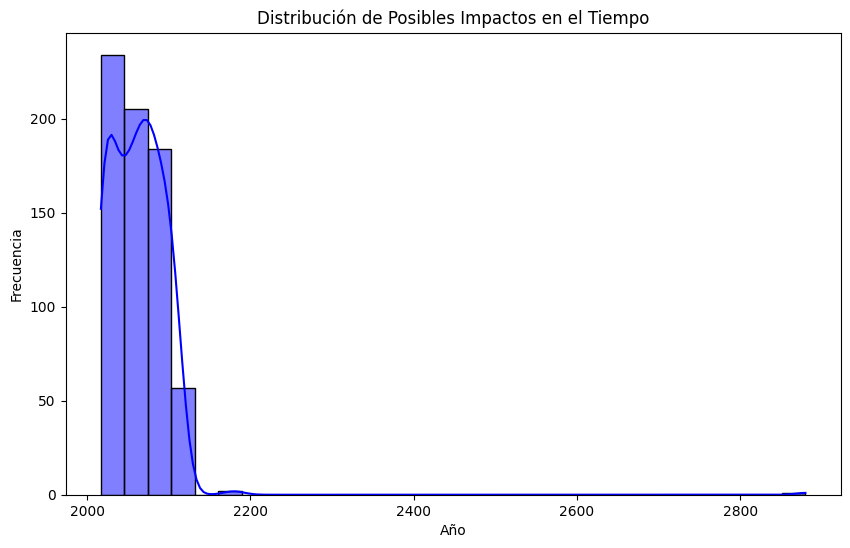

In [5]:
# Gráfico 1: Distribución de los posibles impactos en el tiempo (años)
plt.figure(figsize=(10, 6))
sns.histplot(df['Period Start'], bins=30, kde=True, color='blue')
plt.title('Distribución de Posibles Impactos en el Tiempo')
plt.xlabel('Año')
plt.ylabel('Frecuencia')
plt.show()

# Densidad de asteroides por diámetro y probabilidad de impacto: Grafico Calor-Grafico Contorno.

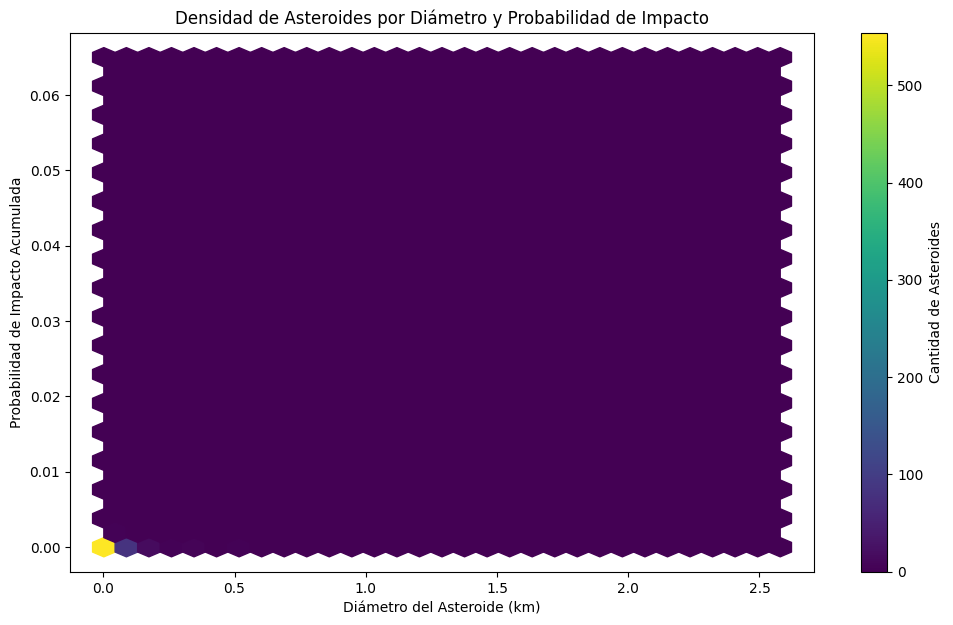

In [16]:
# Gráfico 2: Relación entre el diámetro del asteroide y la probabilidad de impacto
plt.figure(figsize=(12, 7))
plt.hexbin(df['Asteroid Diameter (km)'], df['Cumulative Impact Probability'], gridsize=30, cmap='viridis')
plt.colorbar(label='Cantidad de Asteroides')
plt.title('Densidad de Asteroides por Diámetro y Probabilidad de Impacto')
plt.xlabel('Diámetro del Asteroide (km)')
plt.ylabel('Probabilidad de Impacto Acumulada')
plt.show()



# Probabilidad de impacto por rango de diámetro de asteroides: Grafico Barras-Líneas.

<ipython-input-17-cd2d81b13f4a>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df = df.groupby('Diameter Range')['Cumulative Impact Probability'].mean().reset_index()
<ipython-input-17-cd2d81b13f4a>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Diameter Range', y='Cumulative Impact Probability', data=grouped_df, palette='viridis')


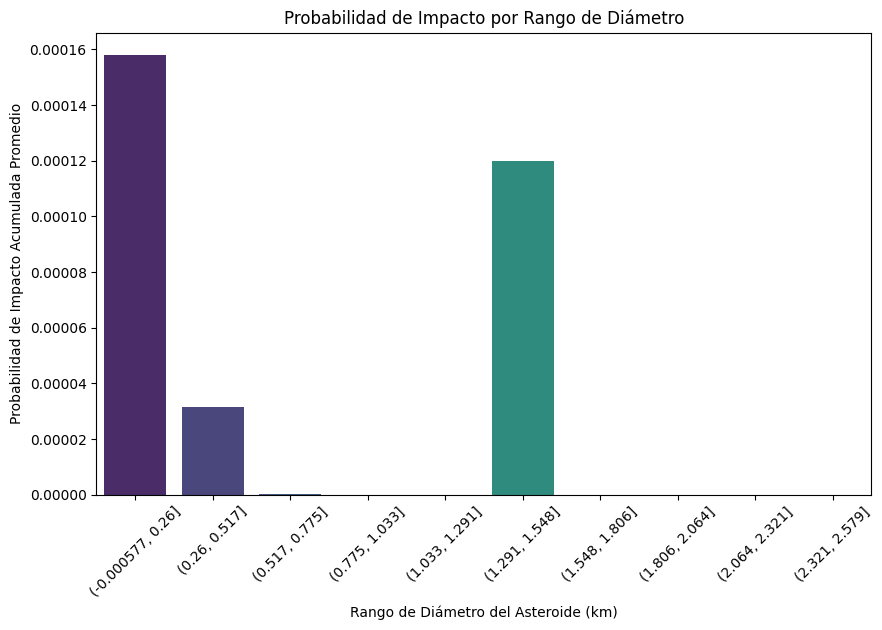

In [17]:
# Gráfico 2: Relación entre el diámetro del asteroide y la probabilidad de impacto

# Crear rangos de diámetro
df['Diameter Range'] = pd.cut(df['Asteroid Diameter (km)'], bins=10)

# Calcular la probabilidad de impacto promedio por rango de diámetro
grouped_df = df.groupby('Diameter Range')['Cumulative Impact Probability'].mean().reset_index()

# Graficar
plt.figure(figsize=(10, 6))
sns.barplot(x='Diameter Range', y='Cumulative Impact Probability', data=grouped_df, palette='viridis')
plt.title('Probabilidad de Impacto por Rango de Diámetro')
plt.xlabel('Rango de Diámetro del Asteroide (km)')
plt.ylabel('Probabilidad de Impacto Acumulada Promedio')
plt.xticks(rotation=45)
plt.show()

# Distribución de la velocidad de los asteroides: Histograma.

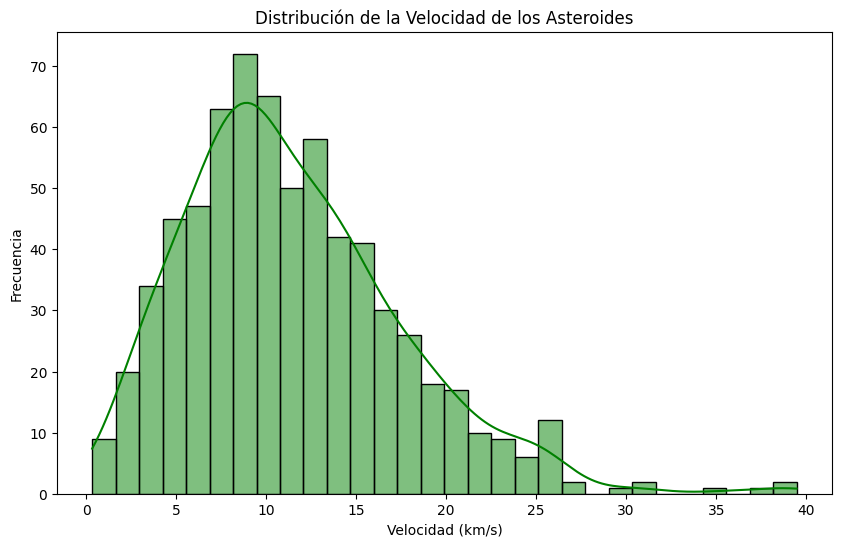

In [12]:
# Gráfico 3: Distribución de la velocidad de los asteroides
plt.figure(figsize=(10, 6))
sns.histplot(df['Asteroid Velocity'], bins=30, kde=True, color='green')
plt.title('Distribución de la Velocidad de los Asteroides')
plt.xlabel('Velocidad (km/s)')
plt.ylabel('Frecuencia')
plt.show()

# Distribución de la Escala de Torino: Grafico Pastel.

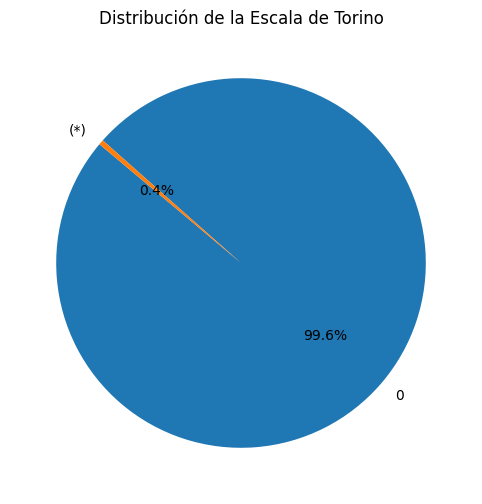

In [18]:
# Gráfico 4: Diagrama de pastel de la escala de Torino
torino_counts = df['Maximum Torino Scale'].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(torino_counts, labels=torino_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de la Escala de Torino')
plt.show()

# Diagrama que muestra los coeficientes de correlación entre varias variables: Matriz De Correlación.

Object Name                        object
Period Start                        int64
Period End                          int64
Possible Impacts                    int64
Cumulative Impact Probability     float64
Asteroid Velocity                 float64
Asteroid Magnitude                float64
Asteroid Diameter (km)            float64
Cumulative Palermo Scale          float64
Maximum Palermo Scale             float64
Maximum Torino Scale               object
Diameter Range                   category
dtype: object


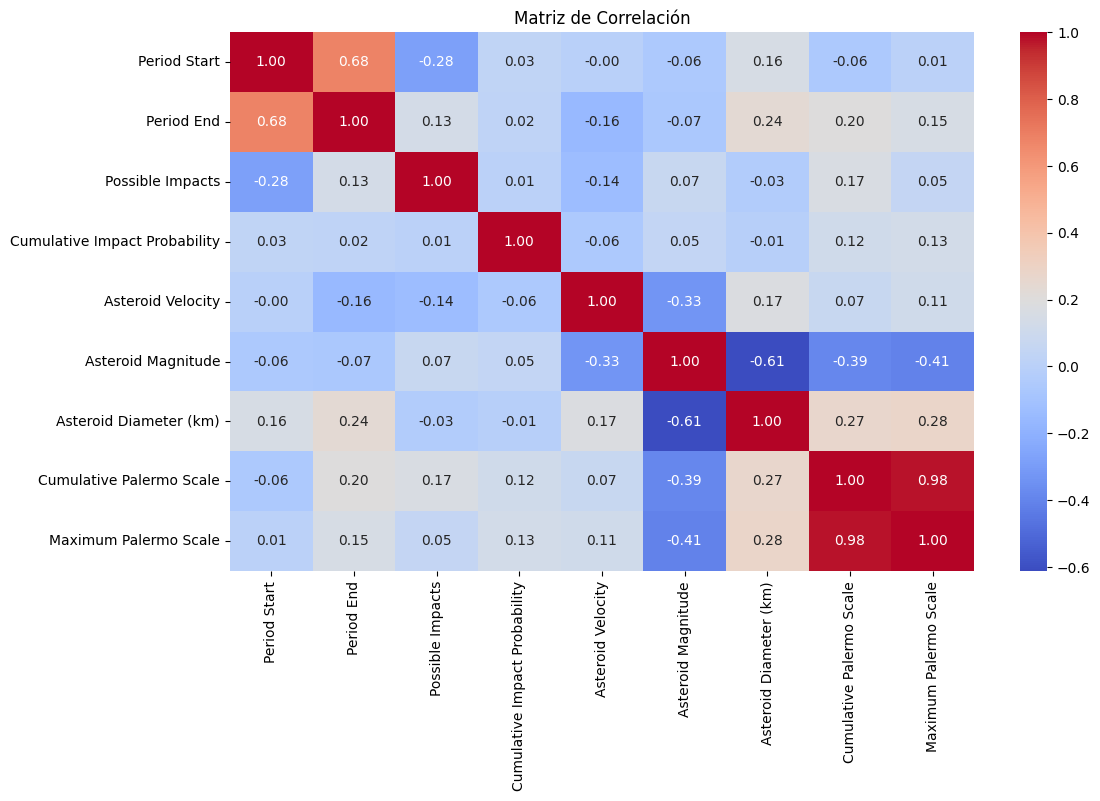

In [19]:
# Gráfico 5: Correlación entre variables numéricas

# Verificar el tipo de datos de las columnas
print(df.dtypes)

# Convertir las columnas problemáticas a string y luego a float
# Asegurarse de que las columnas sean strings antes de reemplazar comas por puntos
df['Cumulative Impact Probability'] = df['Cumulative Impact Probability'].astype(str).str.replace(',', '.').astype(float)
df['Asteroid Diameter (km)'] = df['Asteroid Diameter (km)'].astype(str).str.replace(',', '.').astype(float)

# Seleccionar solo las columnas numéricas para la matriz de correlación
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

# Crear la matriz de correlación
plt.figure(figsize=(12, 7))
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()